In [16]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [17]:
col_1 = np.array([8,9,6,7,3])
col_2 = np.array([2,4,3,5,1])
col_3 = np.array([3,5,4,2,3])
col_4 = np.array([2,2,-1,0,3])

data = np.array([col_1, col_2, col_3, col_4])

dataframe = pd.DataFrame(data.transpose(),columns=['col_1','col_2','col_3', 'col_4'])
dataframe.rename_axis('DATA', axis=1)


DATA,col_1,col_2,col_3,col_4
0,8,2,3,2
1,9,4,5,2
2,6,3,4,-1
3,7,5,2,0
4,3,1,3,3


Reject H0


C:\Users\aaery\AppData\Local\Temp\ipykernel_3696\2033596501.py:36: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  anova_table = anova_table[:].applymap(lambda x: float(x).__round__(2))


ANOVA TABLE,Degrees of Freedom,Sum of Squares,Mean of Squares,F
Source,,,,
Between,3.0,75.75,25.25,8.56
Within,16.0,47.20,2.95,NaN
Total,19.0,122.95,NaN,NaN


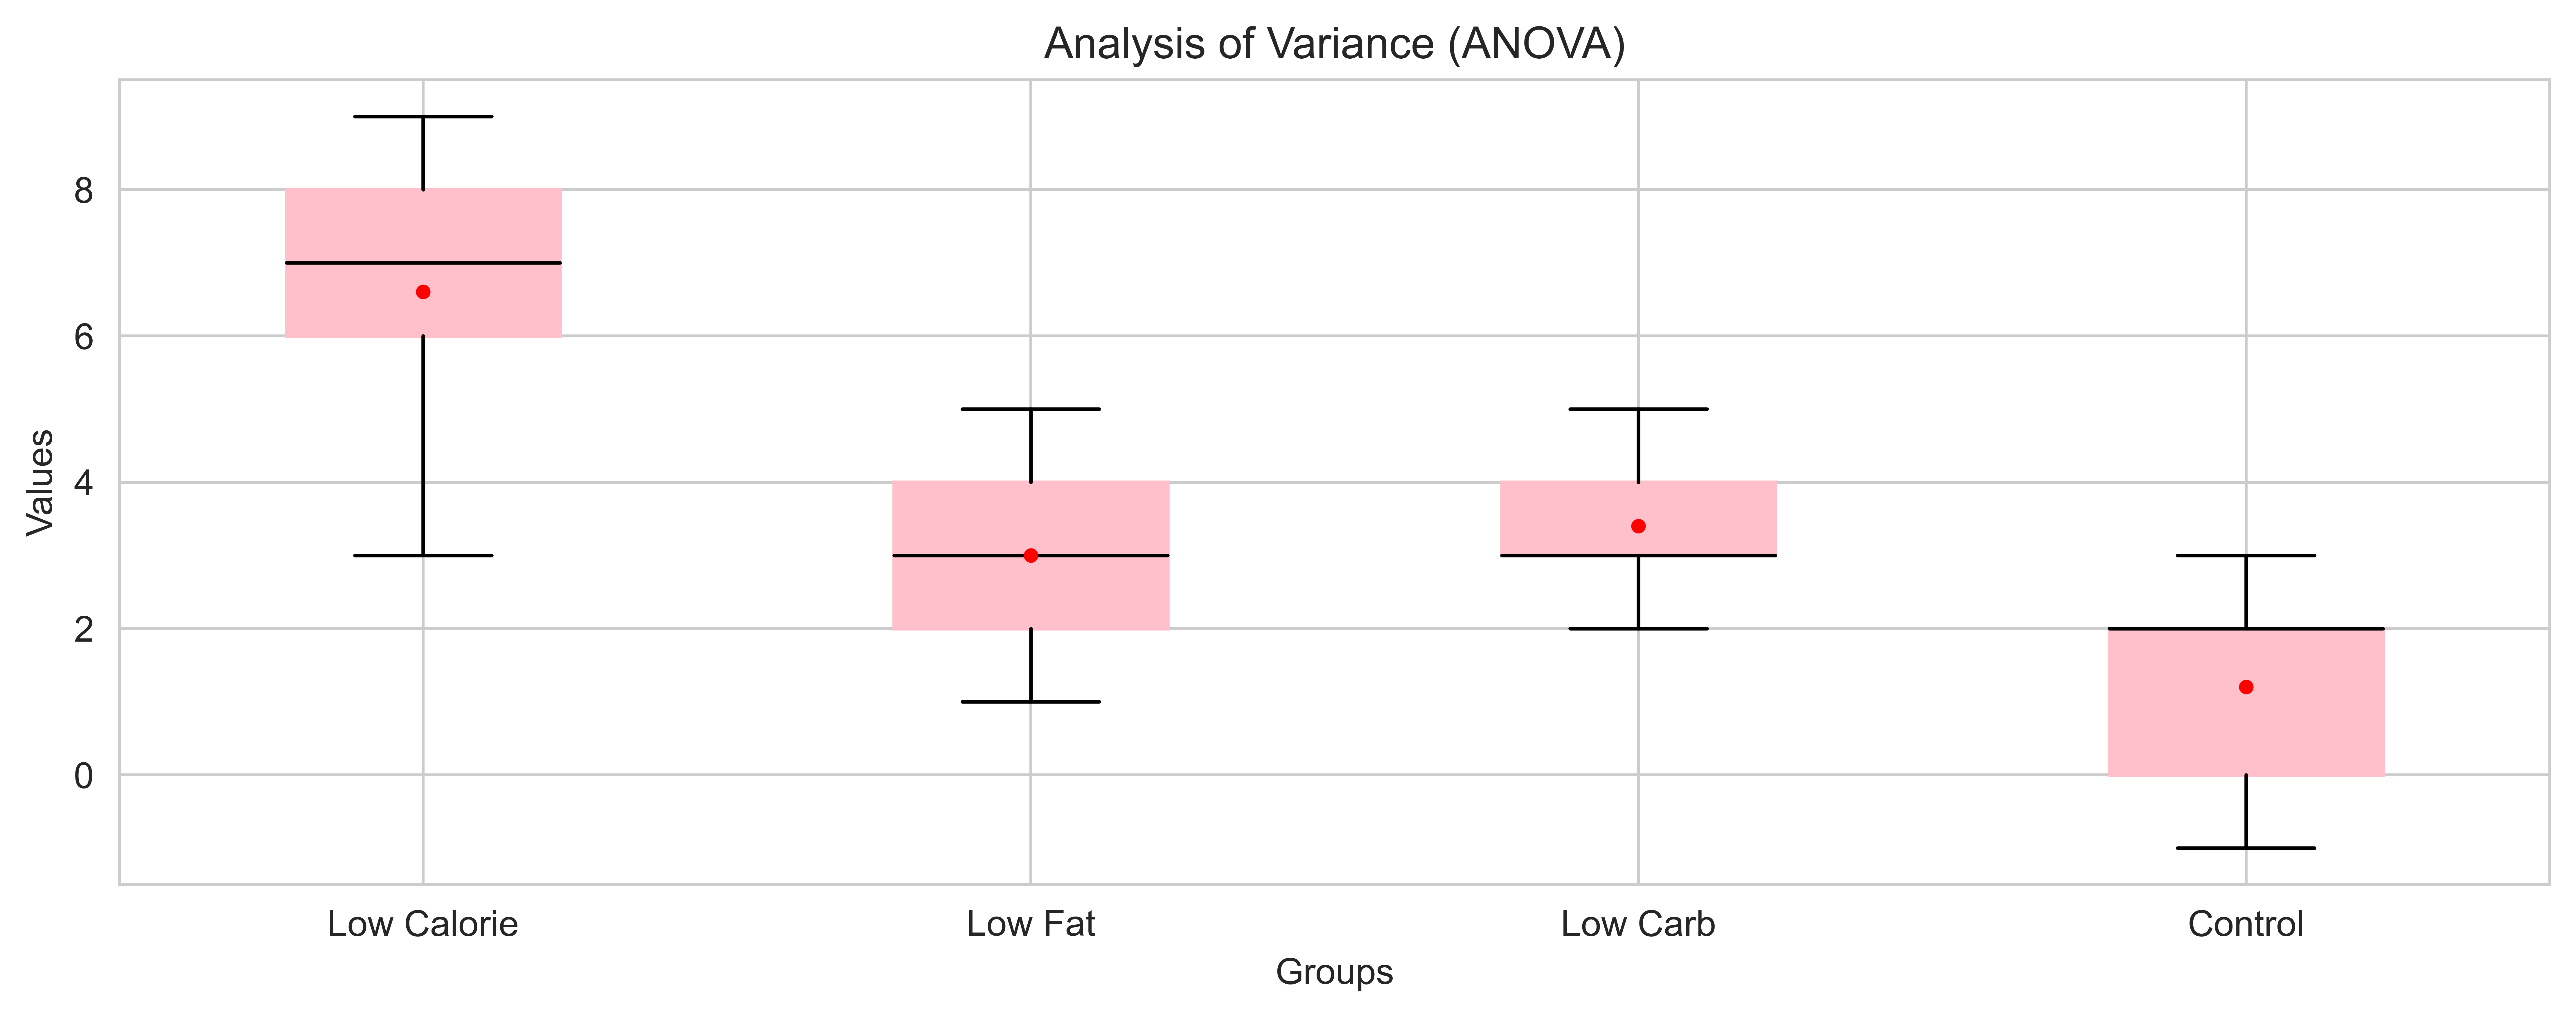

In [35]:
F_crit = 4.26

N = len(dataframe.columns) * len(dataframe.index)
k = float(len(dataframe.columns))
n = (len(dataframe))

df_between = k - 1
df_within = N - k
df_total = N - 1

SS_between = -dataframe.sum().sum()**2 / N
for i in dataframe:
    SS_between += (dataframe[i].sum()**2)/len(dataframe[i])

SS_within = 0
for i in dataframe:
    SS_within += dataframe[i].apply(lambda x: x**2).sum() - (dataframe[i].sum()**2)/len(dataframe[i])

SS_total = (SS_between + SS_within)
MS_between = (SS_between / df_between)
MS_within = (SS_within / df_within)
F_test = MS_between / MS_within

if F_test > F_crit:
    
    print('Reject H0')
    
    #ANOVA TABLE
    anova_table = pd.DataFrame({'Source':['Between','Within','Total'],
                            'Degrees of Freedom':[df_between, df_within, df_total],
                            'Sum of Squares':[SS_between, SS_within, SS_total],
                            'Mean of Squares':[MS_between, MS_within, 0],
                            'F':[F_test, 0, 0]})
    anova_table = anova_table.set_index('Source')
    anova_table = anova_table.rename_axis('ANOVA TABLE', axis=1)
    anova_table = anova_table[:].applymap(lambda x: float(x).__round__(2))
    anova_table = anova_table[anova_table != 0]
    display(anova_table)
    
    sns.color_palette("pastel")
    plt.figure(figsize=(12,4), dpi=900)
    plt.xlabel('Groups')
    plt.ylabel('Values')
    plt.title('Analysis of Variance (ANOVA)')
    plt.boxplot(dataframe, labels=['Low Calorie','Low Fat','Low Carb','Control'], patch_artist=True, boxprops=dict(facecolor='pink', color='pink'), medianprops=dict(color='black'), whiskerprops=dict(color='black'), capprops=dict(color='black'), flierprops=dict(color='black', markeredgecolor='red', markerfacecolor='red'), showmeans=True, meanprops=dict(marker='.', markeredgecolor='red', markerfacecolor='red'), showfliers=True)
    
    
else:
    print('Fail to reject H0')



